#Importing Required Libraries
* Imporitng the required libraries and mounting the drive to train and evaluate the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


#  Load dataset
* The Dataset is been fetched from the Kaggle
* I have attached the dataset in the ZIP file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI and Sus/AIRDATASET (1).csv")

#Handle missing values


# Drop or fill 'Country' column if unused

In [ ]:
#Handle missing values
# Drop or fill 'Country' column if unused
df.dropna(subset=['Country'], inplace=True)

#Statistics

In [ ]:
print(df.describe())

          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16393.000000  16393.000000     16393.000000   16393.000000   
mean      63.227902      1.349356        31.794424       3.851156   
std       43.297779      2.390045        22.975905       5.911545   
min        7.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16393.000000  16393.000000  16393.000000  
mean         60.075520     30.330645     -4.223929  
std          43.378779     22.922043     72.909196  
min           0.000000    -54.801900   -159.771000  
25%          34.000000     16.730000    -75.283300  
50%          52.000000     38.880300      5.601900  
75%    

In [ ]:
print(df.columns.tolist())

['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat', 'lng']


# Visual Analysis

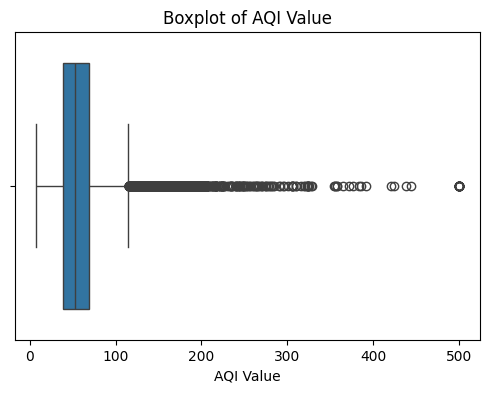

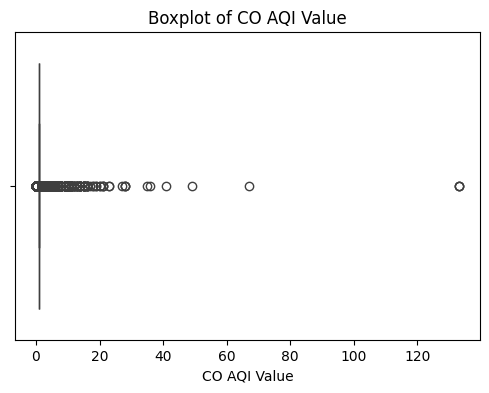

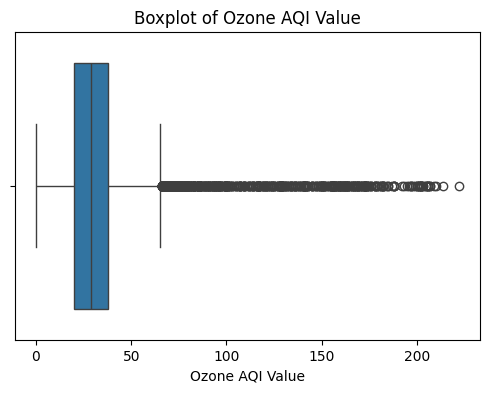

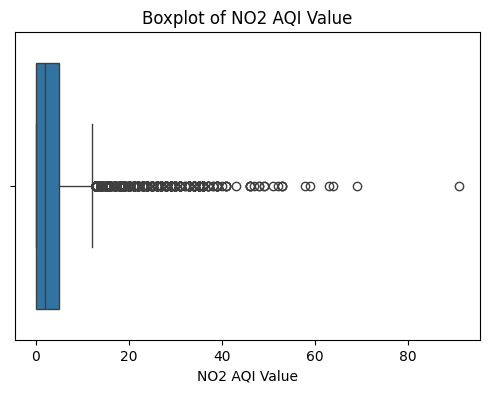

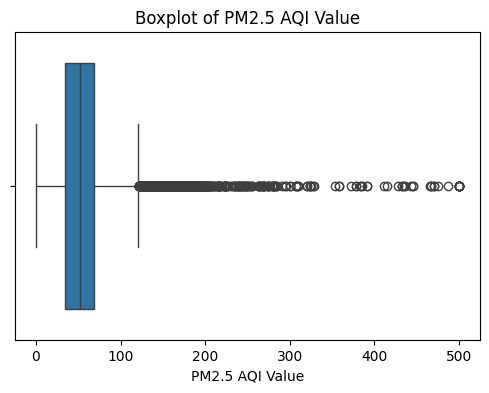

In [ ]:

pollutants = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for feature in pollutants:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Encode AQI Category

In [ ]:
label_encoder = LabelEncoder()
df['AQI_Category_Encoded'] = label_encoder.fit_transform(df['AQI Category'])

#Define features and target

In [ ]:
X = df[pollutants]
y = df['AQI_Category_Encoded']

#Split Data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#Save the X_train, y_train

In [ ]:
np.save("X_train.npy", X_train_scaled)
np.save("X_val.npy", X_val_scaled)
np.save("X_test.npy", X_test_scaled)
np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)


#Save Label

In [ ]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder.classes_, f)
print("Preprocessing complete. Data is cleaned, encoded, scaled, and saved.")

Preprocessing complete. Data is cleaned, encoded, scaled, and saved.


#visualizations Plots

#Box Plot

#Bar Chart

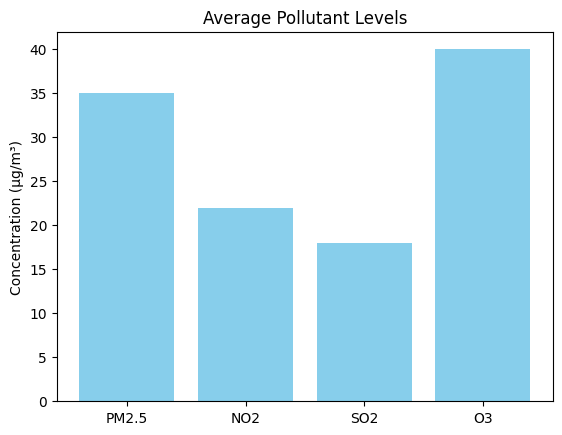

In [ ]:
# Example: Average pollutant levels
pollutants = ['PM2.5', 'NO2', 'SO2', 'O3']
values = [35, 22, 18, 40]
plt.bar(pollutants, values, color='skyblue')
plt.title('Average Pollutant Levels')
plt.ylabel('Concentration (µg/m³)')
plt.show()

#Line Box

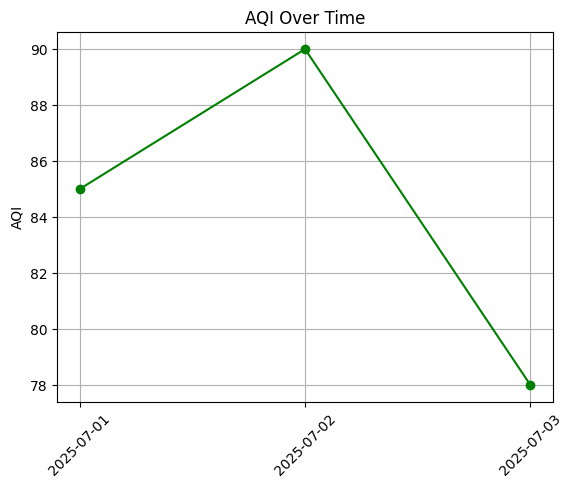

In [ ]:
#AQI over time

dates = ['2025-07-01', '2025-07-02', '2025-07-03']
aqi = [85, 90, 78]
plt.plot(dates, aqi, marker='o', linestyle='-', color='green')
plt.title('AQI Over Time')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Scatter Plot

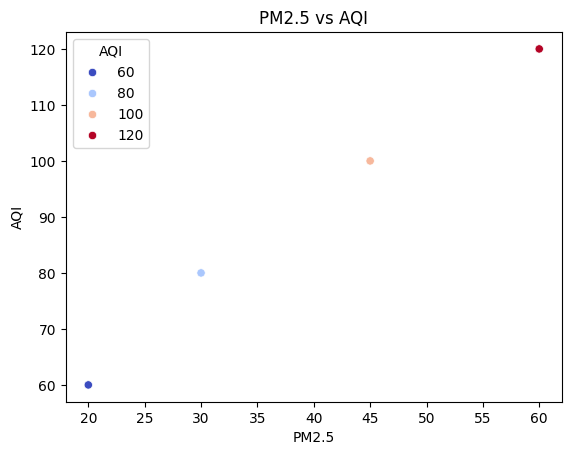

In [ ]:

# PM2.5 vs AQI
df = pd.DataFrame({'PM2.5': [30, 45, 60, 20], 'AQI': [80, 100, 120, 60]})
sns.scatterplot(data=df, x='PM2.5', y='AQI', hue='AQI', palette='coolwarm')
plt.title('PM2.5 vs AQI')
plt.show()

#Pair Plot

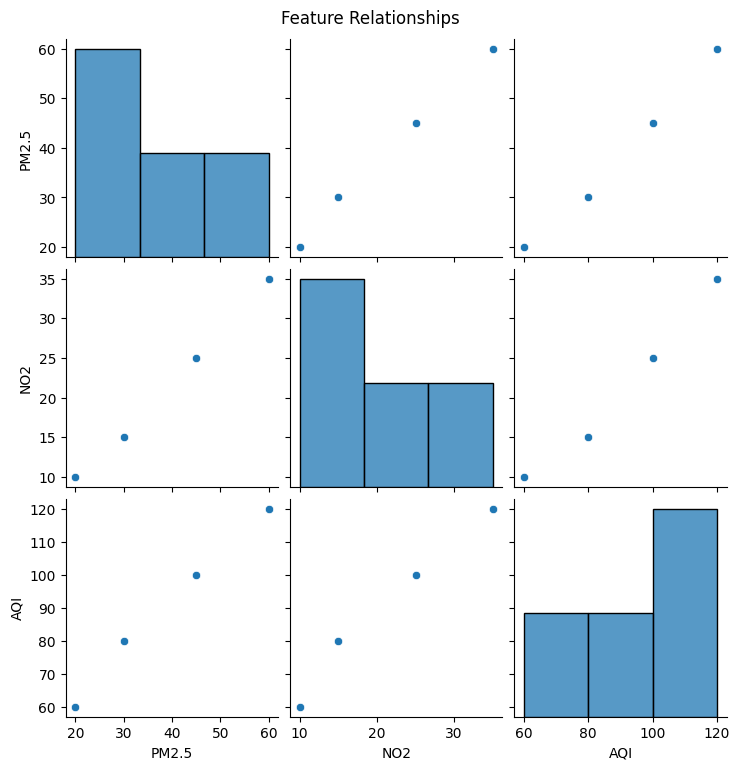

In [ ]:

# Multiple features
df = pd.DataFrame({
    'PM2.5': [30, 45, 60, 20],
    'NO2': [15, 25, 35, 10],
    'AQI': [80, 100, 120, 60]
})

sns.pairplot(df)
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

#Filter Data by City adn Country

In [ ]:
city = "Delhi"
country = "India"
df_city = df[(df["City"] == city) & (df["Country"] == country)]

#Bar Plot by City

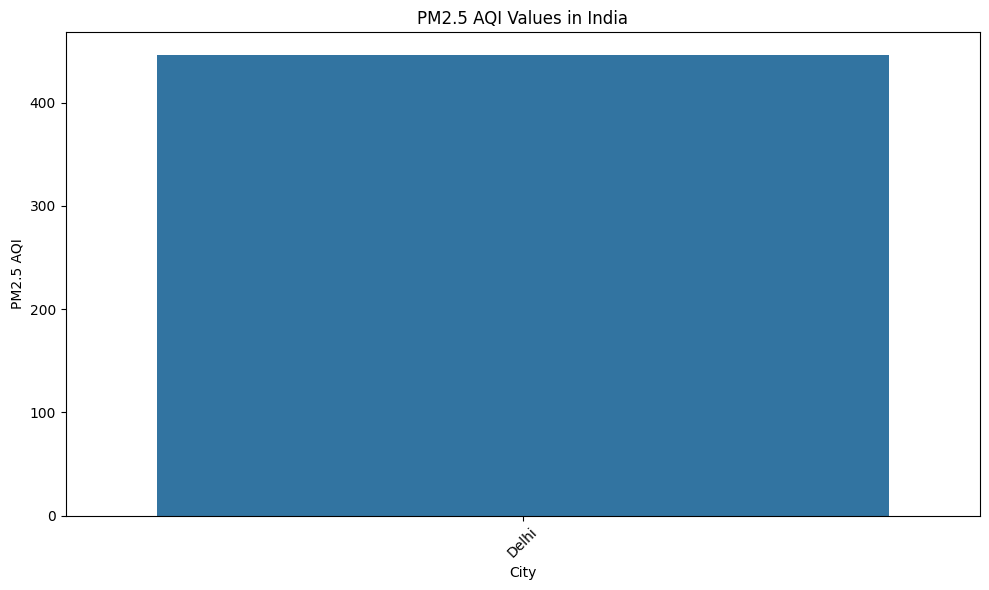

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city, x="City", y="PM2.5 AQI Value")
plt.title(f"PM2.5 AQI Values in {country}")
plt.ylabel("PM2.5 AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Pollutant Comparison (Box Plot)

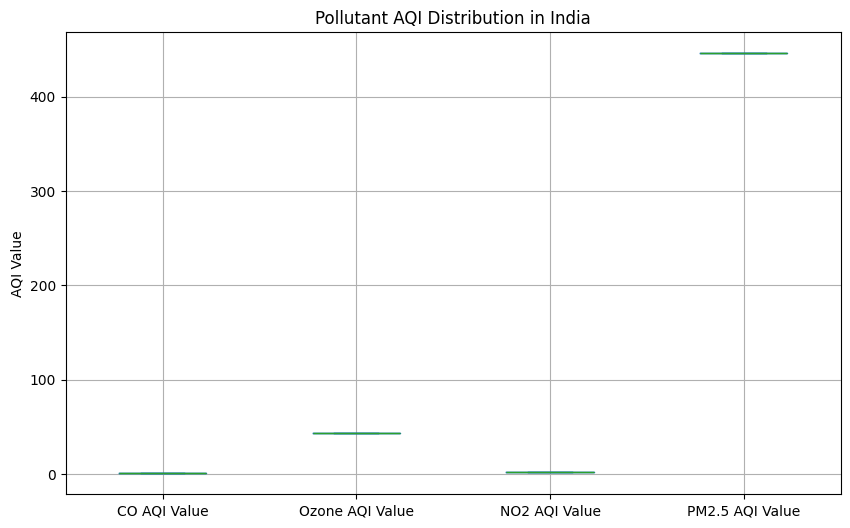

In [ ]:
pollutants = ["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
df_pollutants = df_city[pollutants]

df_pollutants.plot(kind="box", figsize=(10, 6), title=f"Pollutant AQI Distribution in {country}")
plt.ylabel("AQI Value")
plt.grid(True)
plt.show()

In [ ]:
df_city["PM2.5 Exceeds WHO"] = df_city["PM2.5 AQI Value"] > 25
# Count exceedances
exceed_count = df_city["PM2.5 Exceeds WHO"].sum()
print(f"{exceed_count} cities exceed WHO PM2.5 threshold.")

2 cities exceed WHO PM2.5 threshold.


/tmp/ipython-input-1273548576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city["PM2.5 Exceeds WHO"] = df_city["PM2.5 AQI Value"] > 25


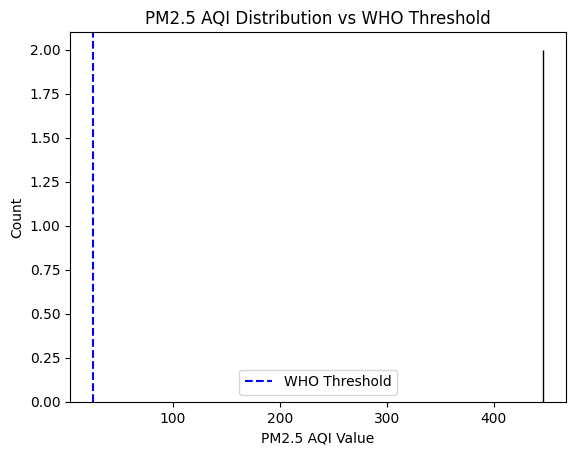

In [ ]:
sns.histplot(data=df_city, x="PM2.5 AQI Value", hue="PM2.5 Exceeds WHO", bins=30, palette={True: "red", False: "green"})
plt.axvline(25, color="blue", linestyle="--", label="WHO Threshold")
plt.legend()
plt.title("PM2.5 AQI Distribution vs WHO Threshold")
plt.xlabel("PM2.5 AQI Value")
plt.show()

#Correlation heatmap

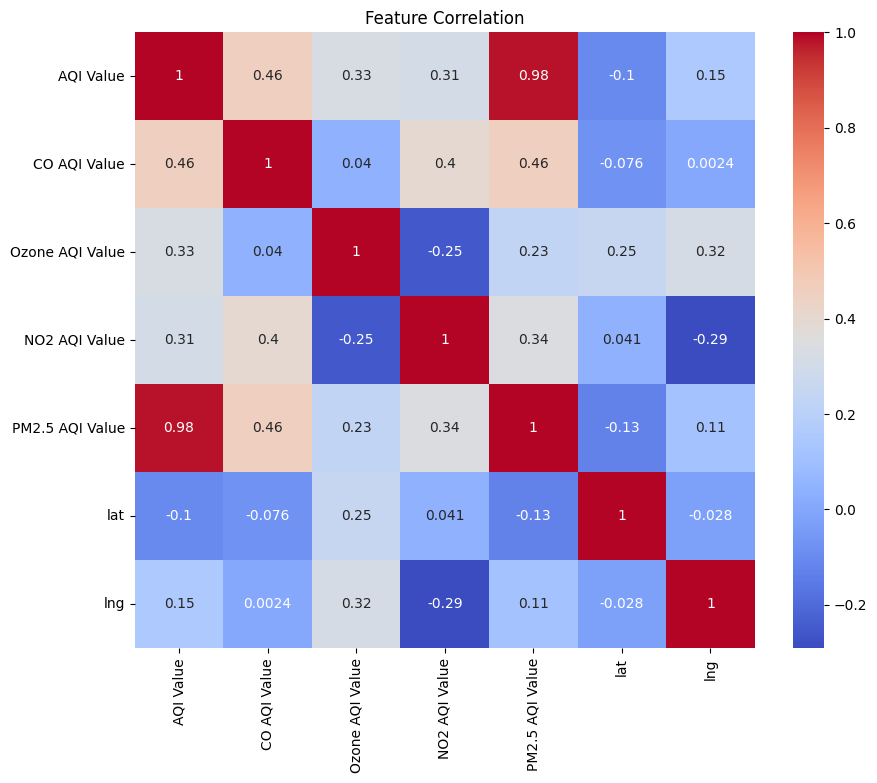

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

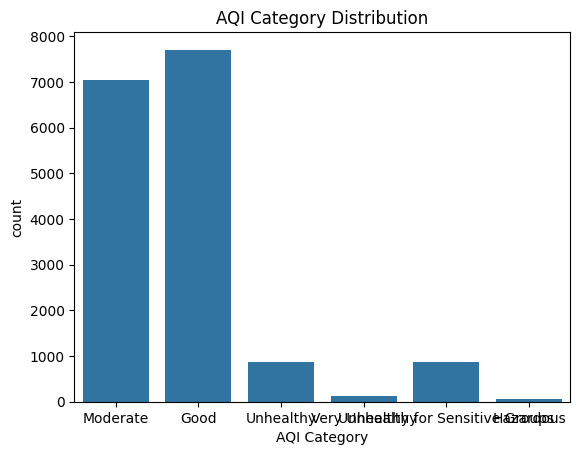

In [ ]:
sns.countplot(x='AQI Category', data=df)
plt.title("AQI Category Distribution")
plt.show()
